<h1><center>Abstract</center><h1>
<h2>A renowned cosmetics brand is spending a good amount of time and efforts in various marketing platforms in order to improve its brand value which in turn hopefully be converted to sales. 
The Management especially is interested in knowing about the social media promotions. The company has been posting various content on its Facebook (FB) page and wants to know how people are reacting to the marketing campaign that are taking place on that page. Company wants to analyse the efficiency of their Facebook page by using the performance metrics provided by Facebook Insights (Joss, 2012). 
This should help the company to determine the factors affecting the reachability and improve the content of the page, so that the page is more effective in reaching to the customers. Thereby improving the brands visibility, this might in turn increase the profits in the due course. </h2>

## Lum Kok Keong (P7320307)
## NSDAI2 Class 2 (Thursday)

### References resources used as follow :
   ####    1. http://dx.doi.org/10.1016/j.jbusres.2016.02.010
   ####    2. https://snap.stanford.edu/proj/socmedia-kdd/
 
We will be using 6 different stages as follow :
-       I - Exploratory data analysis
-      II - Feature engineering
-     III - Modeling
-      IV - Hyperparameters tuning
-       V - Saving the trained Model
-      VI - Submission of test data and results

This is for the Target : Total Interactions


<h1><center>Dataset description</center><h1>
<h2>We are given a dataset that contains various metrics of the cosmetic brand’s Facebook page.  
The dataset is the composition of all the posts that are posted on the brand’s Facebook page for the year of 2014. 
The given Dataset consists of 500 rows (posts) and 19 columns (metrics). In these 19 different parameters for all
the related posts, there is a composition of both categorical and numerical data.
The first 7 colimns are the features / predictators while the rest 12 colmnus are the targets.<h2>


<h1><center>I - Exploratory data analysis</center></h1>   

In [2]:
#=========================================================================
# Import all necessary libraries
#=========================================================================

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# plot matplotlib graph
#%matplotlib inline

#=========================================================================
# Read facebook metric data using pandas and first 5 rows of data
#=========================================================================

FB_df =pd.read_csv('dataset_Facebook.csv', sep=';')
FB_df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [3]:
#=========================================================================
# As we can see that few columns are having very long names by the default 
# way from which they are read in. We shorten the field names by renaming 
# them for coding comfort. The new column names will be used in the place 
# of actual column names for referencing. But the Interpretation will 
# remain the same. Below are the renamed Columns.
#=========================================================================
FB_df_rename = FB_df.rename(columns={'Page total likes':'Page_Likes',
                                     'Post Month':'Month',
                                     'Post Weekday':'Weekday',
                                     'Post Hour':'Hour',
                                     'Lifetime Post Total Reach':'Reach',
                                     'Lifetime Post Total Impressions':'Impression',
                                     'Lifetime Engaged Users':'Engage',
                                     'Lifetime Post Consumers':'Consumers',
                                     'Lifetime Post Consumptions':'Consumptions',
                                     'Lifetime Post Impressions by people who have liked your Page':'Impression_ByLike',
                                     'Lifetime Post reach by people who like your Page':'Reach_ByLike',
                                     'Lifetime People who have liked your Page and engaged with your post':'Engage_ByLike',
                                     'Total Interactions':'Interactions'
                                    })
FB_df_rename.head()

,Page_Likes,Type,Category,Month,Weekday,Hour,Paid,Reach,Impression,Engage,Consumers,Consumptions,Impression_ByLike,Reach_ByLike,Engage_ByLike,comment,like,share,Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [4]:
#=========================================================================
# Read Facebook metric data statistics 
#=========================================================================

FB_df_rename.describe()

,Page_Likes,Category,Month,Weekday,Hour,Paid,Reach,Impression,Engage,Consumers,Consumptions,Impression_ByLike,Reach_ByLike,Engage_ByLike,comment,like,share,Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


In [5]:
#=========================================================================================================
# Read Facebook metric data any missing data 
#
# The count variable shows that 1 value are missing in the Paid & Like columns, Share has 4 missing 
# 
#=========================================================================================================

FB_df_rename.count()

Page_Likes           500
Type                 500
Category             500
Month                500
Weekday              500
Hour                 500
Paid                 499
Reach                500
Impression           500
Engage               500
Consumers            500
Consumptions         500
Impression_ByLike    500
Reach_ByLike         500
Engage_ByLike        500
comment              500
like                 499
share                496
Interactions         500
dtype: int64

In [6]:
FB_df_rename.dtypes

Page_Likes             int64
Type                  object
Category               int64
Month                  int64
Weekday                int64
Hour                   int64
Paid                 float64
Reach                  int64
Impression             int64
Engage                 int64
Consumers              int64
Consumptions           int64
Impression_ByLike      int64
Reach_ByLike           int64
Engage_ByLike          int64
comment                int64
like                 float64
share                float64
Interactions           int64
dtype: object

In [7]:
#=========================================================================================================
# Read Facebook metric data Correlation Details 
#
# Since the first 7 olumns are the features, we would only want to know the features correlations 
# Seems like Page_Likes & Month has the highest positive Correlations
#=========================================================================================================

FB_df_features = FB_df_rename[['Page_Likes','Type','Category','Month','Weekday','Hour','Paid']]
FB_df_features.corr()

,Page_Likes,Category,Month,Weekday,Hour,Paid
Page_Likes,1.000000,-0.091142,0.941192,-0.005401,-0.143807,0.005341
Category,-0.091142,1.000000,-0.127690,-0.053239,-0.107383,-0.022474
Month,0.941192,-0.127690,1.000000,0.017050,-0.176390,-0.018934
Weekday,-0.005401,-0.053239,0.017050,1.000000,0.045857,-0.001963
Hour,-0.143807,-0.107383,-0.176390,0.045857,1.000000,-0.069464
Paid,0.005341,-0.022474,-0.018934,-0.001963,-0.069464,1.000000


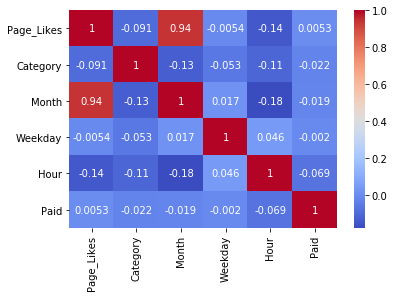

In [8]:
from pandas.plotting import scatter_matrix
import seaborn as sns

# Visualise correlation matrix
sns.heatmap(FB_df_features.corr(), annot=True, cmap='coolwarm')

#scatter_matrix(FB_df_features, alpha=0.2, figsize=(20, 20), diagonal='kde')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


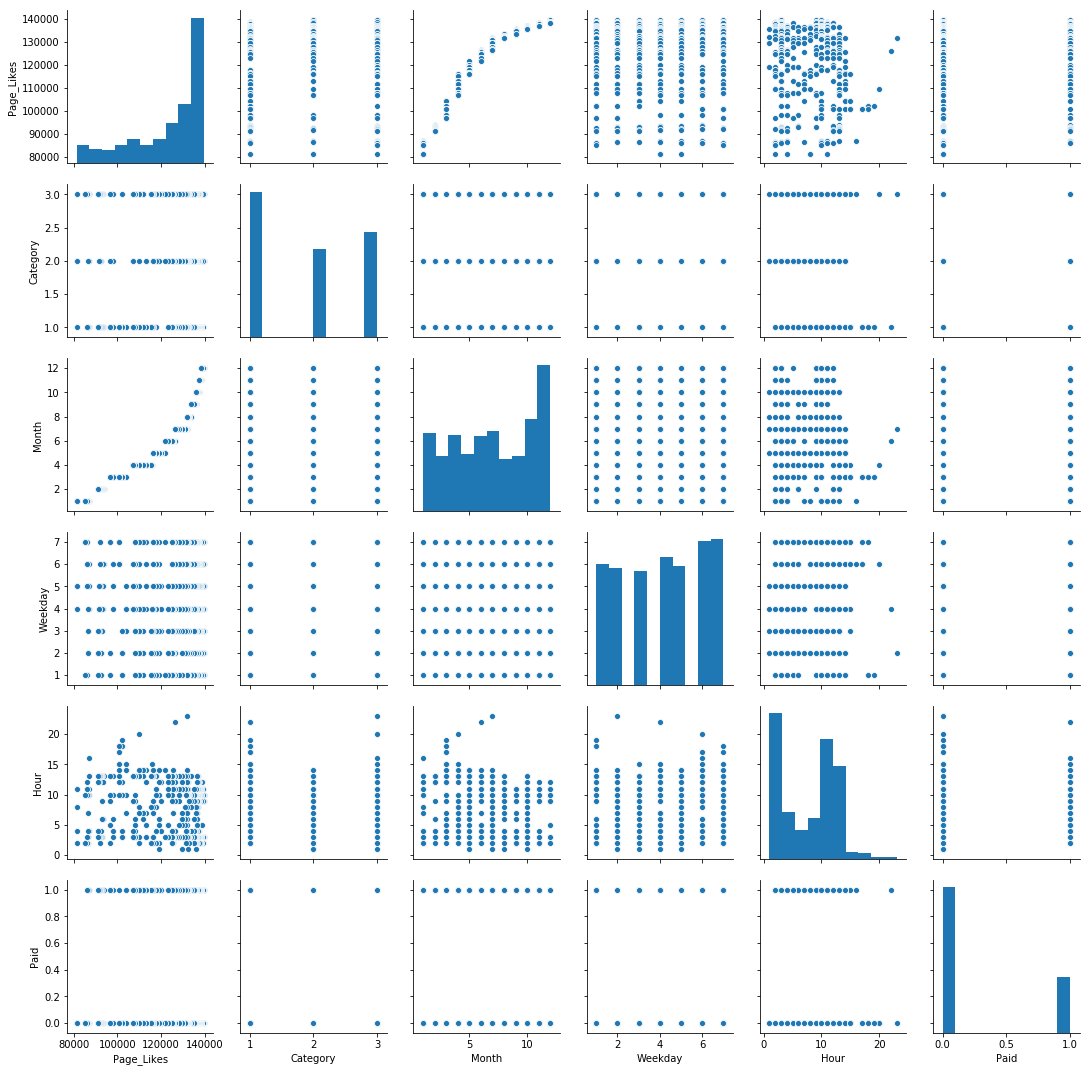

In [9]:
# Visualise pairwise relationship using Seaborn pairplot
sns.pairplot(FB_df_features);

### For extracting knowledge from the “Lifetime Post Total Impressions” implemented model, a data analysis was performed via two approaches: 
    - ﬁrst, the model was assessed to understand which of the input features affected more the outcome 
      of the studied metric; 
    - second, all input features from the most to the least relevant for the model were assessed to 
      discern how each of them inﬂuenced the outcome.


In [10]:
FB_df_rename['Type'].value_counts()

Photo     426
Status     45
Link       22
Video       7
Name: Type, dtype: int64

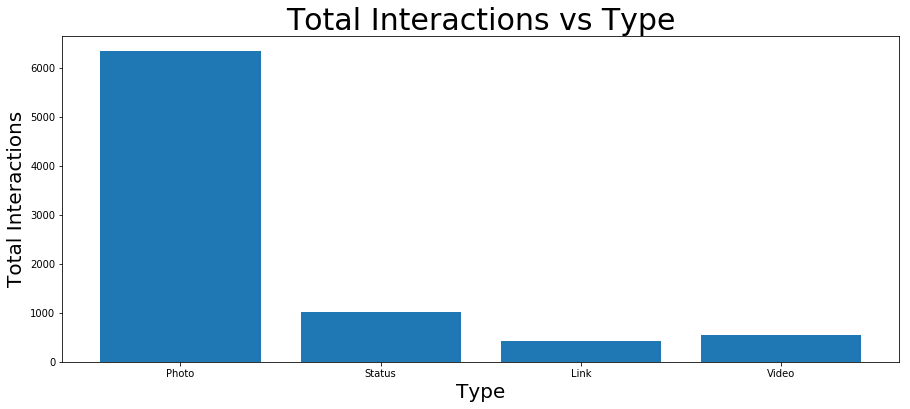

In [11]:
#========================================================================
# Analysing in details for feature Type & Total Interactions 
# Type 'Photo' has the highest influence to the Total Interactions
#========================================================================

#Format the look and feel of the graph
plt.figure(figsize=(15,6))
plt.title('Total Interactions vs Type',fontsize=30)
plt.xlabel('Type',fontsize=20)
plt.ylabel('Total Interactions',fontsize=20)

#Ready to plot the Bar chart
plt.bar(FB_df_rename['Type'], FB_df_rename['Interactions'])
plt.savefig('Interactions-Type-barchart.png',bbox_inches="tight")
plt.show()

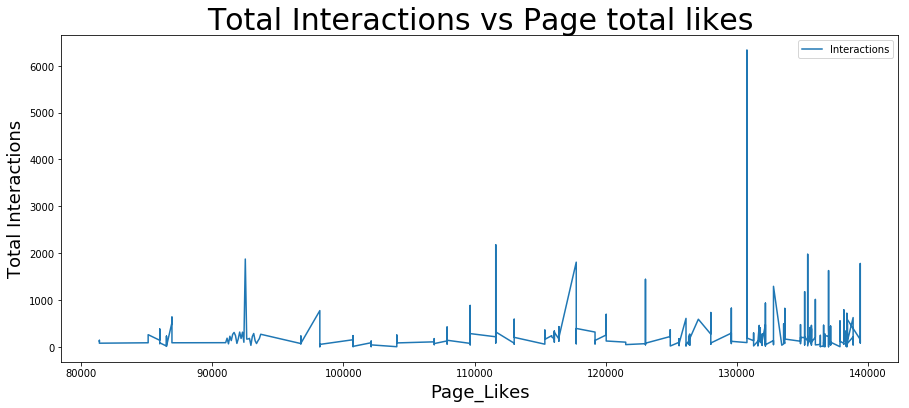

In [12]:
#====================================================================================
# Analysing in details for feature Page_likes & Total Interactions 
# 
#====================================================================================

#to create a x-axis numbering so that the x_label can be turned vertical for readability
#Format the look and feel of the graph
plt.figure(figsize=(15,6))
plt.title('Total Interactions vs Page total likes',fontsize=30)
plt.xlabel('Page_Likes',fontsize=18)
plt.ylabel('Total Interactions',fontsize=18)

plt.xticks(fontsize=10)

#Ready to plot the line chart
plt.plot(FB_df_rename['Page_Likes'],FB_df_rename['Interactions'])

legend = plt.legend()
plt.savefig('Interactions-Page_Like-linechart.png',bbox_inches="tight")
plt.show()

In [13]:
FB_df_rename['Category'].value_counts()

1    215
3    155
2    130
Name: Category, dtype: int64

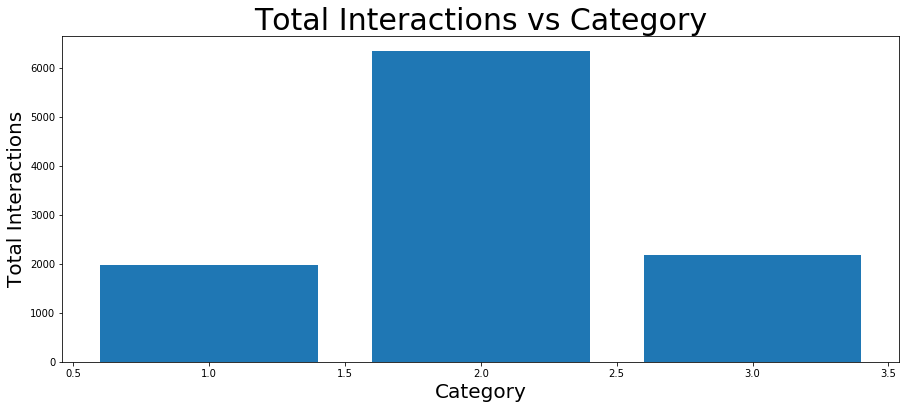

In [14]:
#=============================================================================
# Analysing in details for feature Category & Lifetime Post Total Interactions 
# T
#=============================================================================

#Format the look and feel of the graph
plt.figure(figsize=(15,6))
plt.title('Total Interactions vs Category',fontsize=30)
plt.xlabel('Category',fontsize=20)
plt.ylabel('Total Interactions',fontsize=20)

#Ready to plot the Bar chart
plt.bar(FB_df_rename['Category'], FB_df_rename['Interactions'])
plt.savefig('Interactions-Category-barchart.png',bbox_inches="tight")
plt.show()

In [15]:
FB_df_rename['Month'].value_counts()

10    60
7     52
12    50
4     50
6     49
11    45
5     37
9     36
3     36
8     34
2     26
1     25
Name: Month, dtype: int64

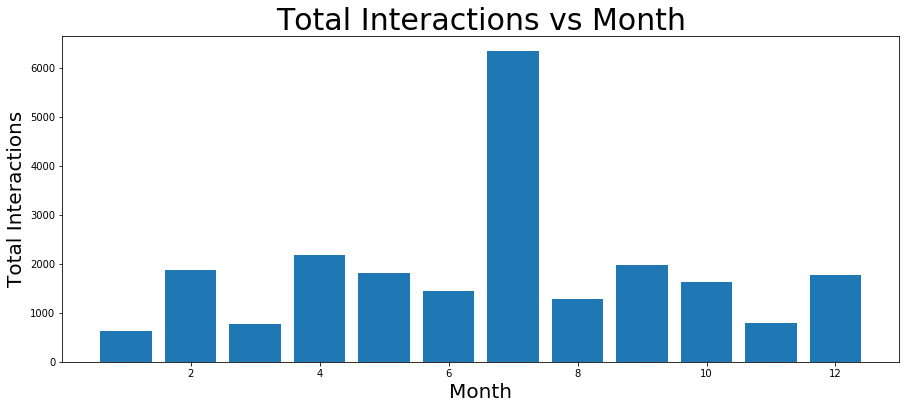

In [16]:
#=========================================================================
# Analysing in details for feature Month & Total Interactions 
#=========================================================================

#Format the look and feel of the graph
plt.figure(figsize=(15,6))
plt.title('Total Interactions vs Month',fontsize=30)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Total Interactions',fontsize=20)

#Ready to plot the Bar chart
plt.bar(FB_df_rename['Month'], FB_df_rename['Interactions'])
plt.savefig('Interactions-Month-barchart.png',bbox_inches="tight")
plt.show()

In [17]:
FB_df_rename['Weekday'].value_counts()

7    82
6    81
4    72
1    68
5    67
2    66
3    64
Name: Weekday, dtype: int64

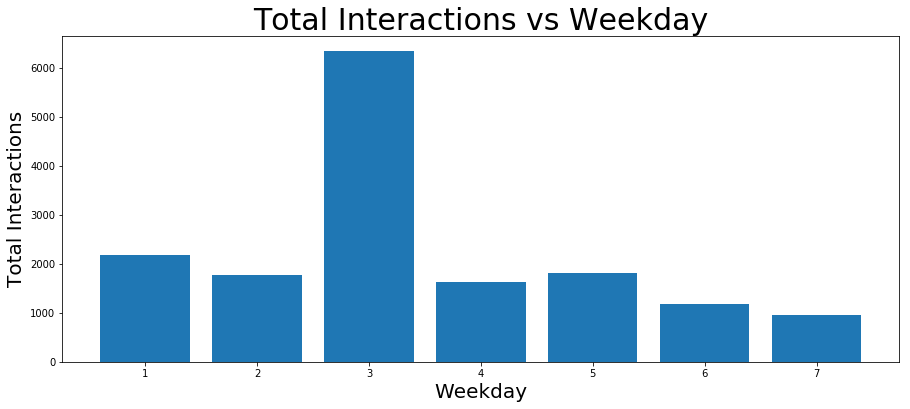

In [18]:
#===========================================================================
# Analysing in details for feature Weekday & Total Interactions 
#===========================================================================

#Format the look and feel of the graph
plt.figure(figsize=(15,6))
plt.title('Total Interactions vs Weekday',fontsize=30)
plt.xlabel('Weekday',fontsize=20)
plt.ylabel('Total Interactions',fontsize=20)

#Ready to plot the Bar chart
plt.bar(FB_df_rename['Weekday'], FB_df_rename['Interactions'])
plt.savefig('Interactions-Weekday-barchart.png',bbox_inches="tight")
plt.show()

In [19]:
FB_df_rename['Hour'].value_counts()

3     105
10     78
13     52
11     44
2      39
4      35
9      30
12     29
6      16
5      13
14     13
7      13
8      12
15      6
1       4
17      3
18      3
22      1
16      1
19      1
20      1
23      1
Name: Hour, dtype: int64

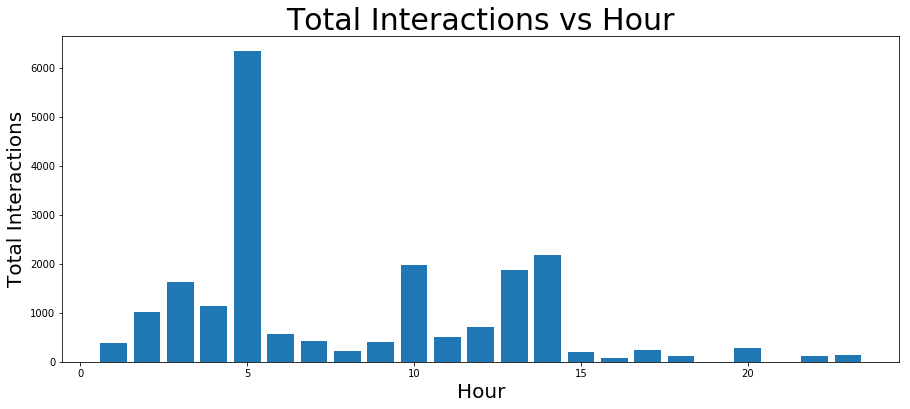

In [20]:
#========================================================================
# Analysing in details for feature Hour & Total Interactions 
#========================================================================

#Format the look and feel of the graph
plt.figure(figsize=(15,6))
plt.title('Total Interactions vs Hour',fontsize=30)
plt.xlabel('Hour',fontsize=20)
plt.ylabel('Total Interactions',fontsize=20)

#Ready to plot the Bar chart
plt.bar(FB_df_rename['Hour'], FB_df_rename['Interactions'])
plt.savefig('Interactions-Hour-barchart.png',bbox_inches="tight")
plt.show()

In [21]:
FB_df_rename['Paid'].value_counts()

0.0    360
1.0    139
Name: Paid, dtype: int64

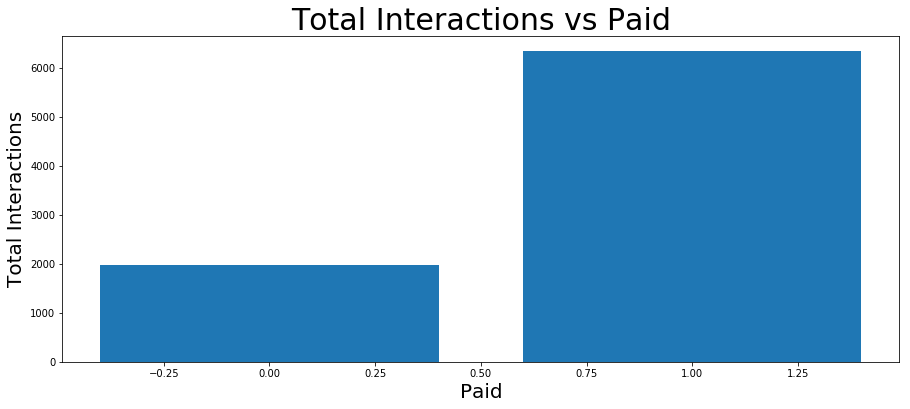

In [22]:
#========================================================================
# Analysing in details for feature Paid & Total Interactions 
#========================================================================

#Format the look and feel of the graph
plt.figure(figsize=(15,6))
plt.title('Total Interactions vs Paid',fontsize=30)
plt.xlabel('Paid',fontsize=20)
plt.ylabel('Total Interactions',fontsize=20)

#Ready to plot the Bar chart
plt.bar(FB_df_rename['Paid'], FB_df_rename['Interactions'])
plt.savefig('Interactions-Paid-barchart.png',bbox_inches="tight")
plt.show()

## Features Data Normality Check

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


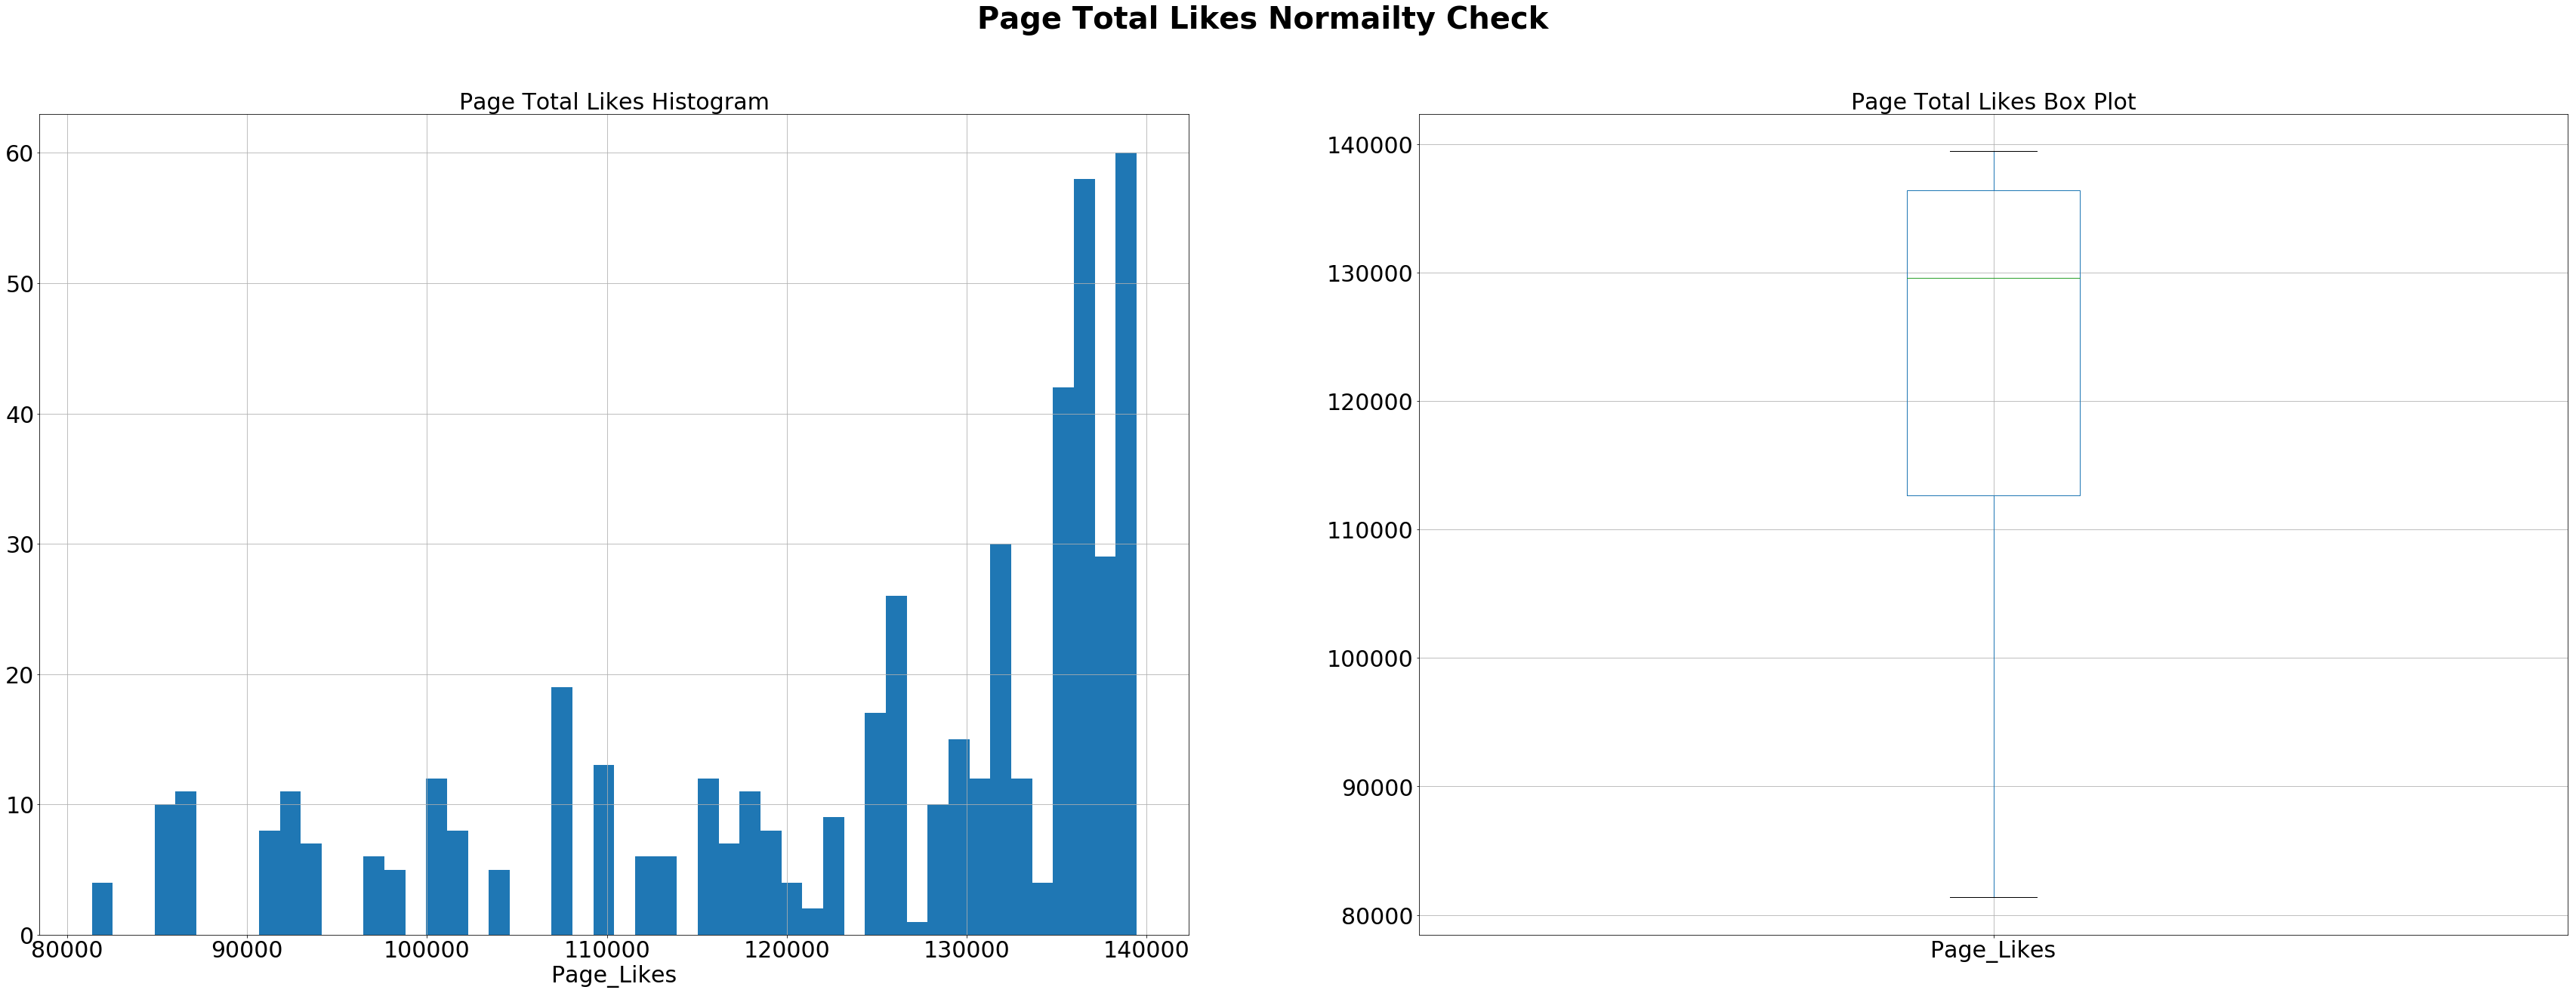

In [23]:
# Checking on Page_Likes data spread and Normality
# Seems like is more skew to the right as shown both in histogram and BoxPlot

# Ploting two figure side by side
fig = plt.figure(figsize=(60,20)) #  figure
fig.suptitle('Page Total Likes Normailty Check', fontsize=40, fontweight='bold')
ax1 = fig.add_subplot(121)
ax1.set_title('Page Total Likes Histogram', fontsize=30)
ax1.set_xlabel('Page_Likes', fontsize=30)
ax1.xaxis.set_tick_params(labelsize=30)
ax1.yaxis.set_tick_params(labelsize=30)
ax2 = fig.add_subplot(122)
ax2.set_title('Page Total Likes Box Plot', fontsize=30)
ax2.xaxis.set_tick_params(labelsize=30)
ax2.yaxis.set_tick_params(labelsize=30)

plt.subplot(121) # 1st figure
FB_df_rename["Page_Likes"].hist(bins=50)

plt.subplot(122) # 2nd figure
FB_df_rename.boxplot(column='Page_Likes')
# Save the chart to file
plt.savefig("Page_Likes Normality Check.png", bbox_inches="tight")

<h1><center>II - Feature engineering</center></h1> 

In [24]:
#*************************************************************************
#               Processing Missing Data
#*************************************************************************

# Processing the FB_df_rename null values
# Remove rows where is null 
FB_df_rename = FB_df_rename.dropna()

In [25]:
FB_df_rename.count()

Page_Likes           495
Type                 495
Category             495
Month                495
Weekday              495
Hour                 495
Paid                 495
Reach                495
Impression           495
Engage               495
Consumers            495
Consumptions         495
Impression_ByLike    495
Reach_ByLike         495
Engage_ByLike        495
comment              495
like                 495
share                495
Interactions         495
dtype: int64

In [28]:
#*************************************************************************
# Since, sklearn requires all inputs to be numeric, we should convert all 
# our categorical variables into numeric by encoding the categories. Before
# that we will fill all the missing values in the dataset. This can be done 
# using the following code: 
#*************************************************************************

FB_df_Encode = pd.get_dummies(FB_df_rename, columns=['Type','Category'])
FB_df_Encode.head()

,Page_Likes,Month,Weekday,Hour,Paid,Reach,Impression,Engage,Consumers,Consumptions,...,like,share,Interactions,Type_Link,Type_Photo,Type_Status,Type_Video,Category_1,Category_2,Category_3
0,139441,12,4,3,0.0,2752,5091,178,109,159,...,79.0,17.0,100,0,1,0,0,0,1,0
1,139441,12,3,10,0.0,10460,19057,1457,1361,1674,...,130.0,29.0,164,0,0,1,0,0,1,0
2,139441,12,3,3,0.0,2413,4373,177,113,154,...,66.0,14.0,80,0,1,0,0,0,0,1
3,139441,12,2,10,1.0,50128,87991,2211,790,1119,...,1572.0,147.0,1777,0,1,0,0,0,1,0
4,139441,12,2,3,0.0,7244,13594,671,410,580,...,325.0,49.0,393,0,1,0,0,0,1,0


In [47]:
FB_df_Encode.count()

Page_Likes           495
Month                495
Weekday              495
Hour                 495
Paid                 495
Reach                495
Impression           495
Engage               495
Consumers            495
Consumptions         495
Impression_ByLike    495
Reach_ByLike         495
Engage_ByLike        495
comment              495
like                 495
share                495
Interactions         495
Type_Link            495
Type_Photo           495
Type_Status          495
Type_Video           495
Category_1           495
Category_2           495
Category_3           495
dtype: int64

<h1><center>III - Modeling</center></h1> 

In [53]:
#=========================================================================
# Train and test split 
#=========================================================================
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

min_max_scaler = MinMaxScaler()
def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df

FeaturesNames = ['Page_Likes','Month','Weekday','Hour','Paid','Type_Link','Type_Photo',
                 'Type_Status','Type_Video','Category_1','Category_2','Category_3']
AllNames = ['Page_Likes','Month','Weekday','Hour','Paid','Type_Link','Type_Photo',
                 'Type_Status','Type_Video','Category_1','Category_2','Category_3','Interactions']
Target = ['Interactions']

X = FB_df_Encode[AllNames]

scaler = MinMaxScaler(feature_range=(0,1))
FB_scaled = scaleColumns(X,FeaturesNames)
X_scaled = FB_scaled[FeaturesNames]
y_scaled = FB_scaled[Target]

# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled,test_size=0.2, random_state=5,shuffle=True)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

(396, 12) (396, 1)
(99, 12) (99, 1)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\P

In [54]:
X_train.columns

Index(['Page_Likes', 'Month', 'Weekday', 'Hour', 'Paid', 'Type_Link',
       'Type_Photo', 'Type_Status', 'Type_Video', 'Category_1', 'Category_2',
       'Category_3'],
      dtype='object')

In [73]:
X_train = X_train.fillna(X_train.mean())
X_train.count()

Page_Likes     396
Month          396
Weekday        396
Hour           396
Paid           396
Type_Link      396
Type_Photo     396
Type_Status    396
Type_Video     396
Category_1     396
Category_2     396
Category_3     396
dtype: int64

In [108]:
X_test = X_test.fillna(X_test.mean())
X_test.count()

Page_Likes     99
Month          99
Weekday        99
Hour           99
Paid           99
Type_Link      99
Type_Photo     99
Type_Status    99
Type_Video     99
Category_1     99
Category_2     99
Category_3     99
dtype: int64

In [74]:
#=========================================================================
# Next, we will import the required modules. Then we will define a generic 
# classification function, which takes a model as input and determines the 
# Accuracy and Cross-Validation scores.
#=========================================================================

#Import models from scikit learn module:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVC
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn import metrics 


# function to compute mean absolute error %
def mean_abs_error_percent(y_true, y_pred):
    diff = (np.abs(y_true - y_pred)) / y_true
    mean = np.sum(diff)/ y_true.count()
    return mean * 100; # return percent
    
#Generic function for making a classification model and accessing performance:

#-----------------------------------------------------------------
# Function for Decision Tree CLassifier and Gradient Boosting CLassifier
#-----------------------------------------------------------------
def regression_model_Tree(model, X_train,y_train):
  #Perform k-fold cross-validation with 10 folds
  kf = KFold(n_splits=10, shuffle=True,random_state=None)
  error = []
  r2_list  = []
  variance = []
  mae_list = []
  mse_list = []
    
  for train, test in kf.split(X_train):
    # Filter training data
    train_predictors = (X_train.iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = y_train.iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Make predictions on training set:
    KFpredictions = model.predict(X_train.iloc[test,:])
    
    #Record error from each cross-validation run
    error.append(model.score(X_train.iloc[test,:], y_train.iloc[test]))
        
    #Print error
    r2  = metrics.r2_score(y_train.iloc[test],KFpredictions)
    mae = metrics.mean_absolute_error(y_train.iloc[test], KFpredictions)
    mse = metrics.mean_squared_error(y_train.iloc[test], KFpredictions)
    var = metrics.explained_variance_score(y_train.iloc[test], KFpredictions)
    
    r2_list.append(r2)
    mae_list.append(mae)
    mse_list.append(mse)
    variance.append(var)
         
  print ('*************************************************************')
  print ('KFold Classification Report : ')
  print ("Error          : " , np.mean(error))
  print ("R2 Score       : " , np.mean(r2))
  print ("Mean Abs Error : ", np.mean(mae_list))
  print ("Mean Sq  Error : ", np.mean(mse_list))
  print ("Variance Score :  ", np.mean(variance))  
  print ('*************************************************************')
      
  #Fit the model again so that it can be refered outside the function:
  model.fit(X_train,y_train) 
   

In [75]:
# Checking on the feature importance weightage
def features_importance(clf, X_train, y_train, FeaturesNames):
    target = y_train
    train = X_train
    
    clf = clf.fit(train,target)
    
    features = pd.DataFrame()
    features['feature'] = train.columns
    features['importance'] = clf.feature_importances_
    features.sort_values(by=['importance'], ascending=True, inplace=True)
    features.set_index('feature', inplace=True)
    print ('*************************************************************')
    features.plot(title = 'Features Importance',fontsize= 30, kind='barh', figsize=(50, 10))
    featimp = pd.Series(clf.feature_importances_, index=FeaturesNames).sort_values(ascending=False)
    print (featimp)
    print('\n**********************************************************')
    pieFeat = pd.DataFrame(featimp)
    fig1, ax1 = plt.subplots()
    ax1.pie(featimp, labels=pieFeat.index, autopct='%1.1f%%',shadow=True, startangle=90)
    

In [76]:
#*************************************************************************************
# Testing of features ['Page_Likes','Type','Category','Month','Weekday','Hour','Paid']
#*************************************************************************************

In [77]:
# Dummy Regression test

model = DummyRegressor()
regression_model_Tree(model, X_train,y_train)

*************************************************************
KFold Classification Report : 
Error          :  -0.06662608213294481
R2 Score       :  -0.0023197705840527494
Mean Abs Error :  151.95878110708415
Mean Sq  Error :  75257.37013003582
Variance Score :   3.3306690738754695e-17
*************************************************************


In [78]:
# Linear Regression test

model = LinearRegression(normalize=True)
regression_model_Tree(model, X_train,y_train)


*************************************************************
KFold Classification Report : 
Error          :  -0.07261133705572861
R2 Score       :  -0.22798471586415703
Mean Abs Error :  152.43461202948146
Mean Sq  Error :  75677.41288699461
Variance Score :   0.000983051873369789
*************************************************************


*************************************************************
KFold Classification Report : 
Error          :  -2.362471602620628
R2 Score       :  -1.1168355221704998
Mean Abs Error :  241.45317307692306
Mean Sq  Error :  199986.56328525644
Variance Score :   -2.2078592767364826
*************************************************************
*************************************************************
Page_Likes     0.324704
Weekday        0.263804
Hour           0.255001
Type_Status    0.061825
Category_1     0.023253
Paid           0.023057
Type_Photo     0.017422
Month          0.014699
Category_2     0.012908
Type_Link      0.001549
Category_3     0.001442
Type_Video     0.000336
dtype: float64

**********************************************************


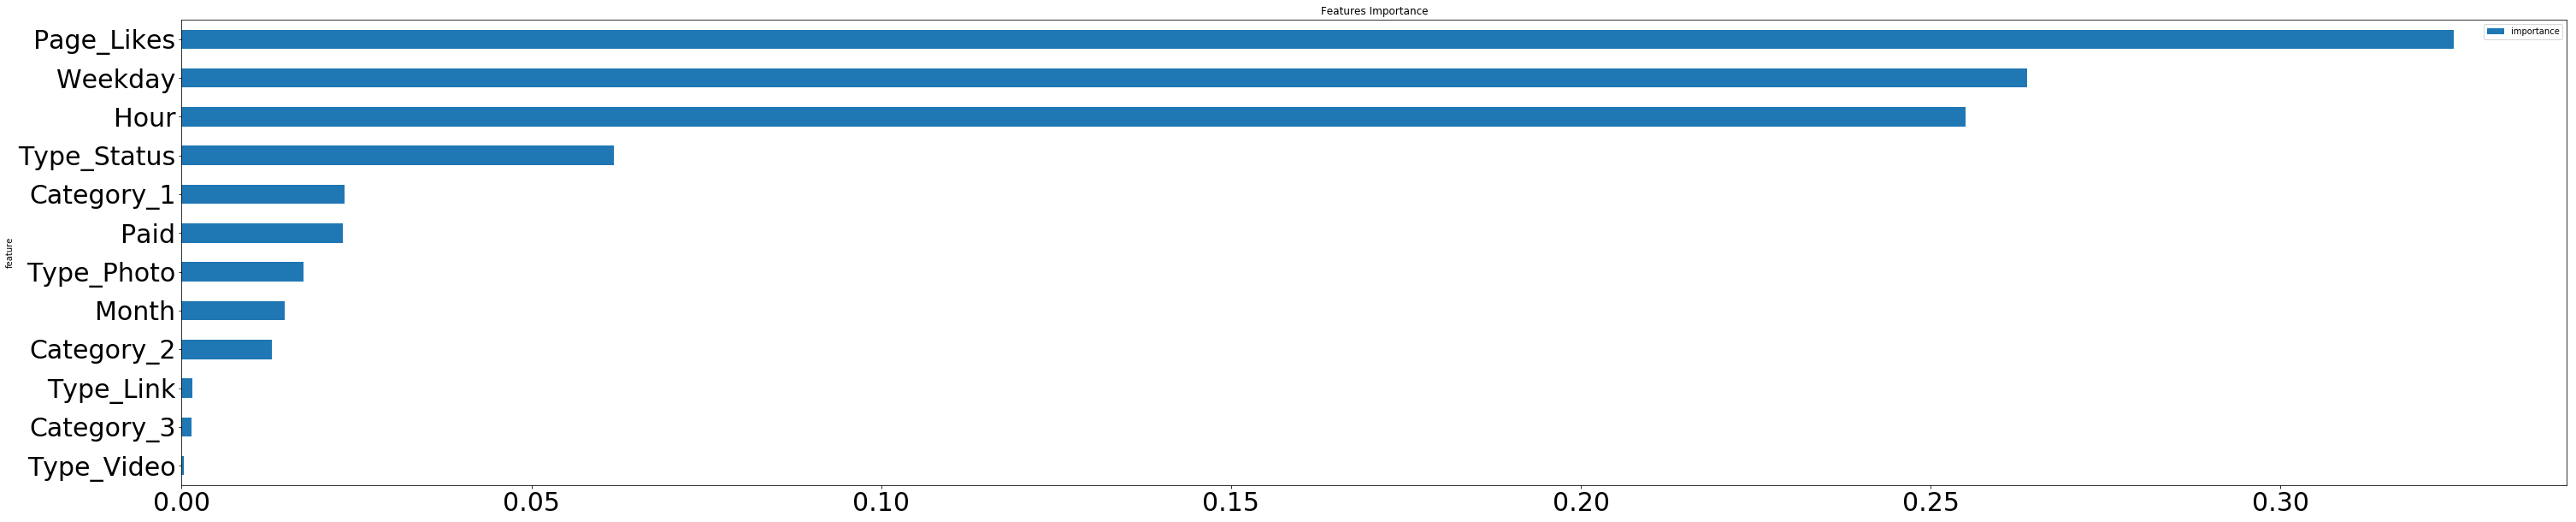

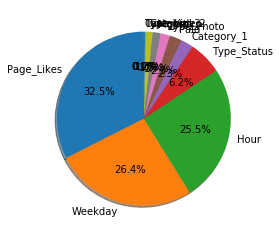

In [79]:
model = DecisionTreeRegressor()
regression_model_Tree(model, X_train,y_train)
features_importance(model, X_train,y_train,FeaturesNames)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: DataConversionWarning: A column-vec

*************************************************************
KFold Classification Report : 
Error          :  -0.5925950206529921
R2 Score       :  -0.2410730929745879
Mean Abs Error :  183.4770897985348
Mean Sq  Error :  94781.40535032078
Variance Score :   -0.44415953043434075
*************************************************************
*************************************************************


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Page_Likes     0.381766
Hour           0.184298
Weekday        0.167751
Month          0.087315
Paid           0.061549
Category_2     0.028556
Category_3     0.023295
Category_1     0.022126
Type_Photo     0.020995
Type_Status    0.019284
Type_Link      0.002541
Type_Video     0.000524
dtype: float64

**********************************************************


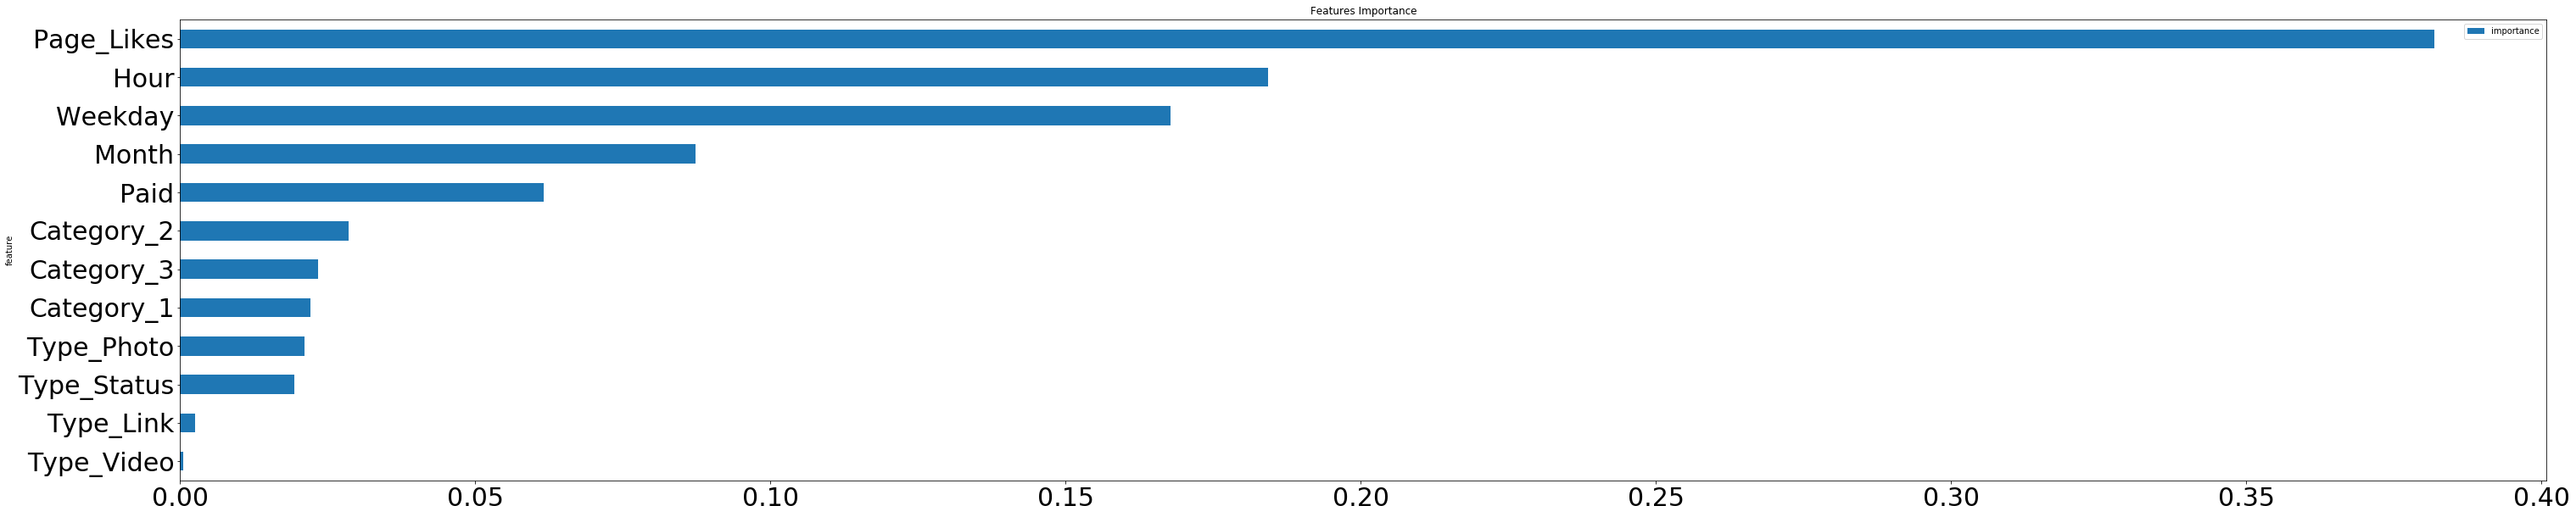

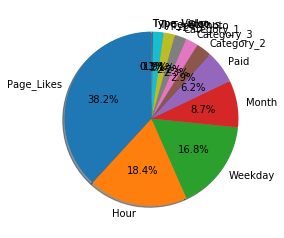

In [80]:
model = RandomForestRegressor(n_estimators=100,oob_score=True)
regression_model_Tree(model, X_train,y_train)
features_importance(model, X_train,y_train,FeaturesNames)

In [81]:
model = Lasso(normalize=True)
regression_model_Tree(model, X_train,y_train)

*************************************************************
KFold Classification Report : 
Error          :  -0.07944747512628916
R2 Score       :  -0.017730290609660804
Mean Abs Error :  152.8442013367785
Mean Sq  Error :  76412.71997960683
Variance Score :   -0.0017788362220492627
*************************************************************


In [83]:
model = SVC(kernel='linear')
regression_model_Tree(model, X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

*************************************************************
KFold Classification Report : 
Error          :  0.0
R2 Score       :  -0.47241784887051863
Mean Abs Error :  156.52743589743585
Mean Sq  Error :  85927.7785897436
Variance Score :   -0.09670461814220818
*************************************************************


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [82]:
model = SVC(kernel='rbf')
regression_model_Tree(model, X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to

*************************************************************
KFold Classification Report : 
Error          :  0.0
R2 Score       :  -0.12625654025831468
Mean Abs Error :  158.44615384615383
Mean Sq  Error :  93183.0844871795
Variance Score :   -0.0027141187054082307
*************************************************************


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to

In [84]:
#*************************************************************************************
# Testing of features ['Page_Likes','Weekday','Hour','Month','Paid','Category']
#*************************************************************************************

In [85]:
# Since the top 6 features in Lasso(normalize=True) shows significant influence factor, 
# The following will use the top 3-6 features to see if is good enough.

FeaturesName6s = ['Page_Likes','Weekday','Hour','Month','Paid','Category_1','Category_2','Category_3']
Target6 = ['Interactions']

X_train_6 = X_train[FeaturesName6s]
y_train_6 = y_train


In [86]:
model = Lasso(normalize=True)
regression_model_Tree(model, X_train_6,y_train_6)

*************************************************************
KFold Classification Report : 
Error          :  -0.021287689325986292
R2 Score       :  0.008562362601861051
Mean Abs Error :  152.14305715347845
Mean Sq  Error :  75182.10858973135
Variance Score :   -0.007164258906059174
*************************************************************


In [87]:
#*************************************************************************************
# Testing of features ['Page_Likes','Weekday','Hour','Month','Paid']
#*************************************************************************************

In [88]:
# Since the top 5 features in Lasso(normalize=True) shows significant influence factor, 
# The following will use the top 3-6 features to see if is good enough.

FeaturesName5s = ['Page_Likes','Weekday','Hour','Month','Paid']
Target5 = ['Interactions']

X_train_5 = X_train[FeaturesName5s]
y_train_5 = y_train

In [89]:
model = Lasso(normalize=True)
regression_model_Tree(model, X_train_5,y_train_5)

*************************************************************
KFold Classification Report : 
Error          :  -0.08901075295971753
R2 Score       :  -0.01138003601946469
Mean Abs Error :  152.56242975511412
Mean Sq  Error :  76336.6925997562
Variance Score :   -0.002938955180775027
*************************************************************


In [90]:
#*************************************************************************************
# Testing of features ['Page_Likes','Weekday','Hour','Month']
#*************************************************************************************

In [91]:
# Since the top 4 features in Lasso(normalize=True) shows significant influence factor, 
# The following will use the top 3-6 features to see if is good enough.

FeaturesName4s = ['Page_Likes','Weekday','Hour','Month']
Target4 = ['Interactions']

X_train_4 = X_train[FeaturesName4s]
y_train_4 = y_train

In [92]:
model = Lasso(normalize=True)
regression_model_Tree(model, X_train_4,y_train_4)

*************************************************************
KFold Classification Report : 
Error          :  -0.011459733482871059
R2 Score       :  -0.04960235044100325
Mean Abs Error :  152.05606596327604
Mean Sq  Error :  74944.13638873825
Variance Score :   -0.002663281973144227
*************************************************************


In [93]:
#*************************************************************************************
# Testing of features ['Page_Likes','Weekday','Hour']
#*************************************************************************************

In [94]:
# Since the top 3 features in Lasso(normalize=True) shows significant influence factor, 
# The following will use the top 3-6 features to see if is good enough.

FeaturesName3s = ['Page_Likes','Weekday','Hour']
Target3 = ['Interaction']

X_train_3 = X_train[FeaturesName3s]
y_train_3 = y_train

In [95]:
model = Lasso(normalize=True)
regression_model_Tree(model, X_train_3,y_train_3)

*************************************************************
KFold Classification Report : 
Error          :  -0.02234050604927671
R2 Score       :  -0.0016732694907348744
Mean Abs Error :  151.72153431458926
Mean Sq  Error :  75180.82074423345
Variance Score :   -0.0021082581661023615
*************************************************************


<h1><center>IV - Hyperparameters tuning</center></h1>  

In [96]:
# Since the top 4 features in Decision Treet Regressor shows significant influence factor, 
# The following will use all 7 features.

FeaturesName4s = ['Page_Likes','Weekday','Hour','Month']
Target4 = ['Interactions']

X_train_4 = X_train[FeaturesName4s]
y_train_4 = y_train

In [97]:
from sklearn.model_selection import GridSearchCV
#metrics.SCORERS.keys() - check scoring options

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

parameter_grid = {
                 'alpha': alpha_lasso,
                 'normalize': [True],
                 }
    
cross_validation = KFold(n_splits=10, shuffle=True,random_state=None)

grid_search = GridSearchCV(Lasso(normalize=True),
                           scoring='neg_mean_absolute_error',
                           param_grid=parameter_grid,
                           cv=cross_validation,
                           verbose=1,
                           n_jobs=-1
                           )

grid_search.fit(X_train_4,y_train_4)
model = grid_search
parameters = grid_search.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    1.9s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.9s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [98]:
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
model = Lasso(**parameters)
model.fit(X_train_4,y_train_4)

Best score: -152.05007495564337
Best parameters: {'alpha': 5, 'normalize': True}


Lasso(alpha=5, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
   positive=False, precompute=False, random_state=None, selection='cyclic',
   tol=0.0001, warm_start=False)

In [99]:
regression_model_Tree(model, X_train_4,y_train_4)

*************************************************************
KFold Classification Report : 
Error          :  -0.050294725945875696
R2 Score       :  -0.1323395306533075
Mean Abs Error :  152.2464870441118
Mean Sq  Error :  75296.24768831598
Variance Score :   0.0
*************************************************************


<h1><center> VI - Submission of test data and results</center></h1>   

In [100]:
# For Lasso

In [110]:
# Lasso test

model = Lasso(alpha=5, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
   positive=False, precompute=False, random_state=None, selection='cyclic',
   tol=0.0001, warm_start=False)

regression_model_Tree(model, X_test,y_test)

*************************************************************
KFold Classification Report : 
Error          :  -1.1558547464920441
R2 Score       :  -0.28599402732127577
Mean Abs Error :  232.8578505904909
Mean Sq  Error :  432764.3790221865
Variance Score :   -0.5985312079810112
*************************************************************


 <h1><center>V - Saving the trained Model</center></h1>  

In [111]:
# We can save the trained model clf using pickle 
import pickle

model = model = Lasso(alpha=5, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
   positive=False, precompute=False, random_state=None, selection='cyclic',
   tol=0.0001, warm_start=False)

regression_model_Tree(model, X_test,y_test)

s = pickle.dumps(model)
pickle.dump(model, open( "FB_Interactions_trained_model.p", "wb" ) )
#model2 = pickle.load( open( "Titanic_trained_model.p", "rb" ) )

# Alternatively, we can save the trained model clf with sklearn joblib
from sklearn.externals import joblib
joblib.dump(model, 'FB_Interactions_trained_model.pkl') 
#model3 = joblib.load('Titanic_trained_model.pkl')

*************************************************************
KFold Classification Report : 
Error          :  -1.3756419866498155
R2 Score       :  -2.209992812154449
Mean Abs Error :  233.7283508039337
Mean Sq  Error :  432642.61086006043
Variance Score :   -0.6146965986787676
*************************************************************


['FB_Interactions_trained_model.pkl']

In [112]:
# Lasso test
model2 = pickle.load( open( "FB_Interactions_trained_model.p", "rb" ) )
regression_model_Tree(model2, X_test,y_test)

*************************************************************
KFold Classification Report : 
Error          :  -1.3137265025272287
R2 Score       :  -0.6951571350516406
Mean Abs Error :  237.61816083079256
Mean Sq  Error :  435983.3245440329
Variance Score :   -0.3034257276859635
*************************************************************
